1/1 [==============================] - 0s 26ms/step


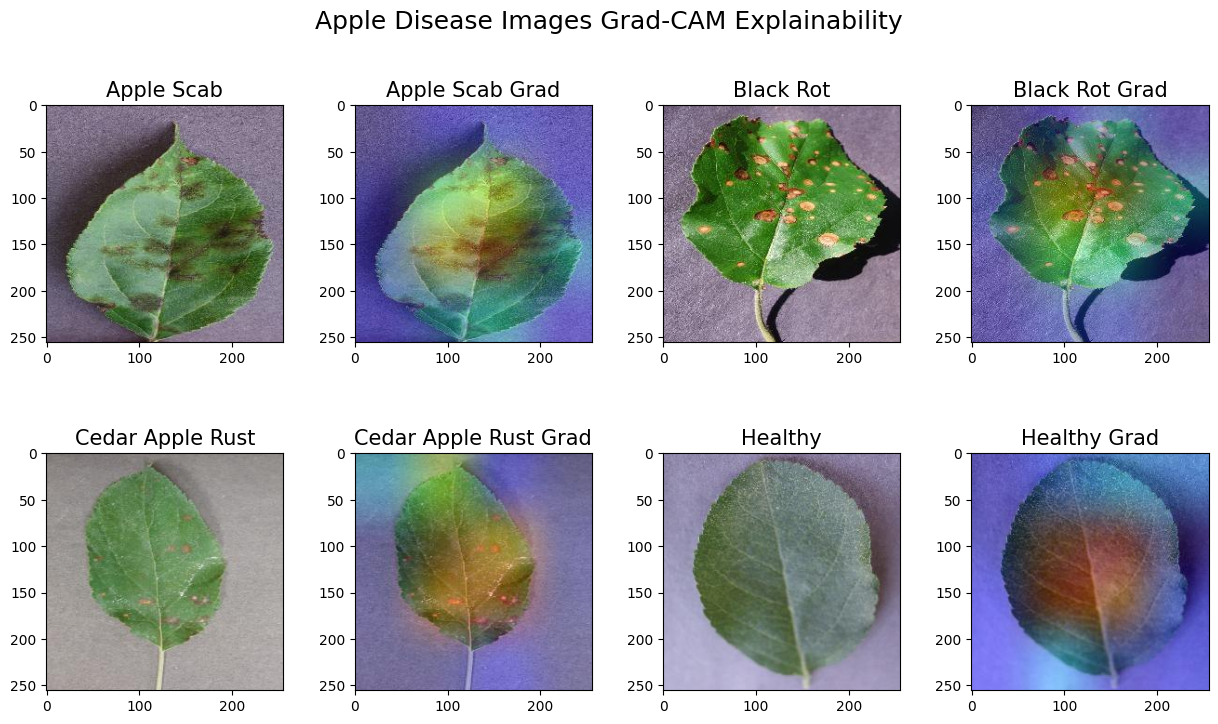

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import load_img,img_to_array,array_to_img
from keras.models import load_model

list_images_sample = [r'D:\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\0e90fe4a-e8b6-4186-9429-a9fea180af9a___FREC_Scab 3391.JPG',
r'D:\New Plant Diseases Dataset(Augmented)\train\Apple___Black_rot\0bc40cc3-6a85-480e-a22f-967a866a56a1___JR_FrgE.S 2784.JPG',
r'D:\New Plant Diseases Dataset(Augmented)\train\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG',
r'D:\New Plant Diseases Dataset(Augmented)\train\Apple___healthy\00a6039c-e425-4f7d-81b1-d6b0e668517e___RS_HL 7669.JPG']

model_builder = keras.applications.xception.Xception
img_size = (50, 50)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
imag = []

last_conv_layer_name = "re_lu_24"

# To Get Image into numpy array

def get_img_array(img_path, size):
    img = load_img(img_path, target_size = size) 
    array = img_to_array(img) 
    array = np.expand_dims(array, axis = 0)
    return array

# Top create heatmaps for the samples

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Storing Heatmap values into list

covid_noncovid_heatmap = []
model = load_model('plant-disease-resnet.h5')

for i in list_images_sample:
    img_array = preprocess_input(get_img_array(i, size = img_size))
    model.layers[-1].activation = None
    preds = model.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    covid_noncovid_heatmap.append(heatmap)
    
# To Display GradCAM output for the samples

def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
    img = load_img(img_path)
    img = img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    
    imag.append(cv2.imread(img_path)[:,:,::-1])
    imag.append(cv2.imread(f"./{cam_path}")[:,:,::-1])


for i in range(len(list_images_sample)):
    save_and_display_gradcam(list_images_sample[i], covid_noncovid_heatmap[i])
    
    
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, myaxes = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()
    

titles_list = ["Apple Scab",'Apple Scab Grad','Black Rot','Black Rot Grad','Cedar Apple Rust','Cedar Apple Rust Grad','Healthy','Healthy Grad']

plot_multiple_img(imag, titles_list, ncols = 4, main_title = "Apple Disease Images Grad-CAM Explainability")

1/1 [==============================] - 0s 25ms/step


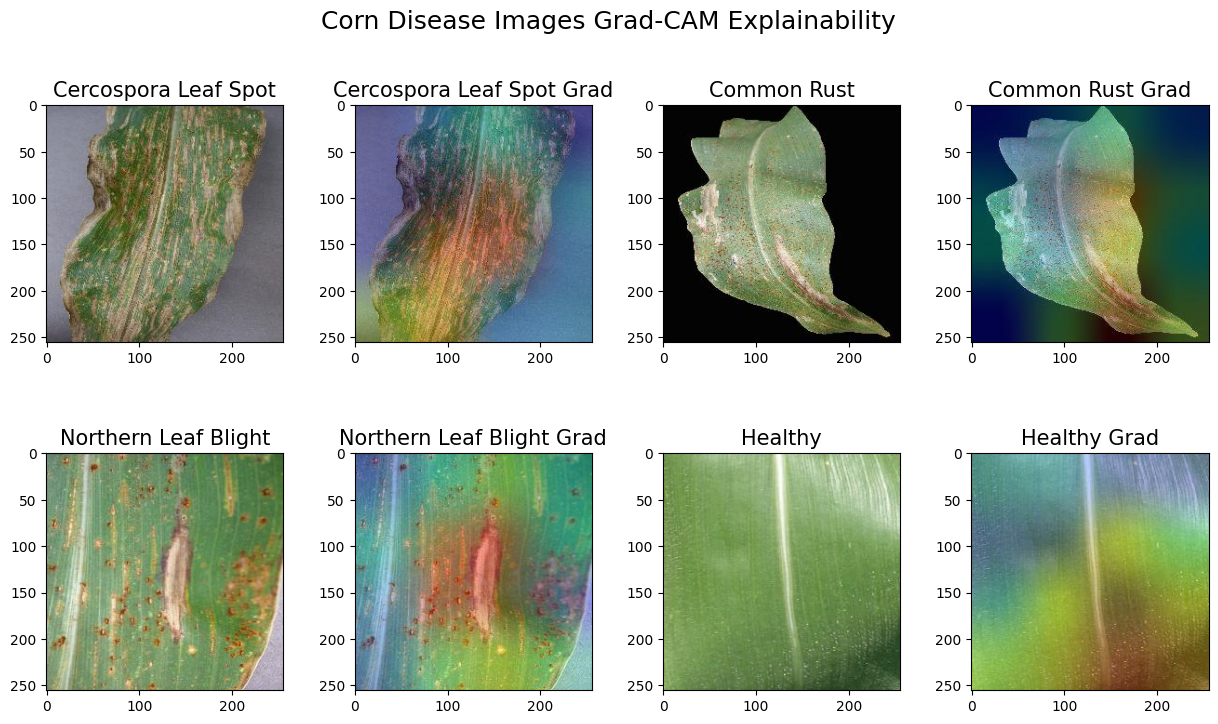

In [3]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import load_img,img_to_array,array_to_img
from keras.models import load_model

list_images_sample = [r'D:\New Plant Diseases Dataset(Augmented)\train\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot\00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655.JPG',
r'D:\New Plant Diseases Dataset(Augmented)\train\Corn_(maize)___Common_rust_\RS_Rust 1563.JPG',
r'D:\New Plant Diseases Dataset(Augmented)\train\Corn_(maize)___Northern_Leaf_Blight\0a11f9e8-7357-48c2-8550-daeae59a1e76___RS_NLB 3588.JPG',
r'D:\New Plant Diseases Dataset(Augmented)\train\Corn_(maize)___healthy\0a2dec45-729b-4825-b814-a73d14e8c7fe___R.S_HL 8211 copy.JPG']

model_builder = keras.applications.xception.Xception
img_size = (50, 50)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
imag = []

last_conv_layer_name = "re_lu_24"

# To Get Image into numpy array

def get_img_array(img_path, size):
    img = load_img(img_path, target_size = size) 
    array = img_to_array(img) 
    array = np.expand_dims(array, axis = 0)
    return array

# Top create heatmaps for the samples

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Storing Heatmap values into list

covid_noncovid_heatmap = []
model = load_model('plant-disease-resnet.h5')

for i in list_images_sample:
    img_array = preprocess_input(get_img_array(i, size = img_size))
    model.layers[-1].activation = None
    preds = model.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    covid_noncovid_heatmap.append(heatmap)
    
# To Display GradCAM output for the samples

def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
    img = load_img(img_path)
    img = img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    
    imag.append(cv2.imread(img_path)[:,:,::-1])
    imag.append(cv2.imread(f"./{cam_path}")[:,:,::-1])


for i in range(len(list_images_sample)):
    save_and_display_gradcam(list_images_sample[i], covid_noncovid_heatmap[i])
    
    
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, myaxes = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()
    

titles_list = ["Cercospora Leaf Spot",'Cercospora Leaf Spot Grad','Common Rust','Common Rust Grad','Northern Leaf Blight','Northern Leaf Blight Grad','Healthy','Healthy Grad']

plot_multiple_img(imag, titles_list, ncols = 4, main_title = "Corn Disease Images Grad-CAM Explainability")